# Crawling & Scraping 

**Scraping** : 웹이나 다운로드 된 HTML자료에서 정보를 추출하는 기법 

**Crawling** : 웹 페이지의 하이퍼링크를 돌아다니며, 웹 페이지를 다운로드 하는 기법 

- Python에서 Crawling 
    - Web에 Python 프로그래밍 라이브러리를 활용해 접근하여 정보를 추출 
    - Web 내 여러 하이퍼링크에 자동으로 접속하여 데이터를 추출 
    - 라이브러리 (Library)
        - Beautiful Soup : HTML & XML 문서 분석 라이브러리 
        - **Selenium** : Application이나 Web Testing 라이브러리 
        - Scrapy : API를 활용한 웹 데이터 수집 라이브러리 

## MacOS Install

- 크롬 드라이버 다운로드
    - 크롬 브라우져를 사용하기 위해 크롬 드라이버를 다운로드 
    - 본인의 크롬 브라우져 버전에 맞는 드라이버를 다운로드
        - 크롬 브라우져의 설정 -> 도움말 -> Chrome 정보를 확인
    - https://sites.google.com/a/chromium.org/chromedriver/downloads

- 경로 변경
    - 크롬 드라이버를 글로벌하게 사용하기 위해서 경로를 변경해 줍니다. 
    - 경로를 수정하지 않으면 코드에서 크롬드라이버 경로를 항상 작성해 줘야 합니다.
    - `$ mv ~/Download/chromedriver /usr/local/bin`

- 셀레니움 파이썬 패키지 설치
    - `$ sudo pip install selenium`
    - `$ conda install -c conda-forge selenium`

## Windows Install


- 크롬 드라이버 다운로드
    - 크롬 브라우져를 사용하기 위해 크롬 드라이버를 다운로드
    - https://sites.google.com/a/chromium.org/chromedriver/downloads
    - https://chromedriver.storage.googleapis.com/index.html?path=2.42/


- 환경변수 추가
    - 내컴퓨터 오른쪽 클릭 -> 속성 -> 고급시스템설정 -> 환경변수 -> 시스템변수의 Path 더블클릭 -> chromedriver path를
추가
    - 예: C:₩Users₩(사용자계정이름)₩chromdriver 으로 추가
    - 환경변수 추가 후에도 드라이버가 실행되지 않는 경우에는 아래의 두가지 방법의 사용이 가능
        - 크롬 드라이버 파일을 동일한 디렉토리에 위치해서 실행
        - 크롬 드라이버를 호출하는 함수에 아규먼트로 크롬 드라이버의 파일경로를 추가
 
 
- 셀레니움 파이썬 패키지 설치
    - `$ conda install -c conda-forge selenium`
    또는
    - `$ pip install --user selenium`

In [1]:
!pip install --user selenium

In [2]:
from selenium import webdriver # 웹 크롤링 라이브러리 호출 

In [3]:
# 드라이버를 이용하여 웹페이지를 열기 
driver = webdriver.Chrome('chromedriver')

In [4]:
# 드라이버를 종료하여 웹페이지를 끄기 
driver.quit()

In [5]:
# Mac 사용자 
# !pip install webdriver_manager
# from webdriver_manager.chrome import ChromeDriverManage
# driver = webdriver.Chrome(ChromeDriverManager().install())

# 1. E-Mart 데이터 수집 

In [5]:
# Python 3.7 / Selenium Version New 
driver = webdriver.Chrome('chromedriver')
driver.get('http://emart.ssg.com/') # get : 특정 웹 페이지에 접속 

from selenium.webdriver.common.by import By
driver.find_element(By.XPATH, '//*[@id="e_gnb"]/div/div[1]/div[2]/ul[2]/li[12]/a').click()

In [6]:
# 제품 이름 가져오기 
driver.find_element(By.XPATH, 
                    '//*[@id="ty_thmb_view"]/ul/li[1]/div[2]/div[2]/div/a/em[1]').text

'노브랜드 전자레인지 22A MWM-N2201'

In [7]:
# 제품 금액 가져오기 
driver.find_element(By.XPATH, 
                   '//*[@id="ty_thmb_view"]/ul/li[1]/div[2]/div[3]/div/em').text

'56,800'

In [82]:
# 반복적으로 구성되어 있는 여러 항목을 추출 
# 상품명이 1번부터 80번까지 구성됨을 확인 
'//*[@id="ty_thmb_view"]/ul/li[1]/div[2]/div[2]/div/a/em[1]'
'//*[@id="ty_thmb_view"]/ul/li[80]/div[2]/div[2]/div/a/em[1]'

'//*[@id="ty_thmb_view"]/ul/li[1]/div[2]/div[3]/div/em'

'//*[@id="ty_thmb_view"]/ul/li[1]/div[2]/div[3]/div/em'

In [83]:
# 현재 페이지 내에 있는 모든 상품명 및 금액을 수집 
for i in range(1, 80 +1):
    prdouct_name = driver.find_element(By.XPATH, 
        '//*[@id="ty_thmb_view"]/ul/li['+str(i)+']/div[2]/div[2]/div/a/em[1]').text    
    product_price = driver.find_element(By.XPATH, 
        '//*[@id="ty_thmb_view"]/ul/li['+str(i)+']/div[2]/div[3]/div/em').text
    print(prdouct_name)
    print(product_price)

노브랜드 전자레인지 22A MWM-N2201
56,800
깔끔한 내 옷 충전형 보풀 제거기
19,900
필립스 미니 믹서기 HR2604/80
49,900
작고 가벼운 고속충전 보조배터리(10,000mAh)_베이지
29,900
간편하게 요리하는 미니 멀티팟
29,900
[로지텍코리아 정품] 무선마우스 B175
9,900
L`s 넥밴드 선풍기(화이트)
7,980
L`s 넥밴드 선풍기(레드)
7,980
일리 프란시스 Y3.3 화이트
139,000
CANNON 복합기 MG2490
49,000
스위치 Pro컨트롤러:스플래툰3
79,800
일렉 믹서 EBR3216PN
35,000
일렉 20L 전자레인지 EMM20K18GWI
74,000
(G)일렉트로맨 혼족 미니 화로 EGF-H1901
32,800
스마텍 20000mAh보조배터리(STPB-QW20, WH)
29,900
인사이디 캠핑겸용 랜턴+선풍기
27,960
노브랜드 저소음 무선마우스 21B(ASM-N2101
5,980
복합열선 대용량 잔치팬
79,800
오래 사용하는 C타입 고속 케이블 (2M)
8,900
일렉맨 혼족 스팀다리미IG-7465W
14,900
프리미엄 혼족 토스터 TS-E0215
24,900
[로지텍코리아] 유선 키보드 K120(NEW)
11,900
카페리아 전동우유거품기
2,900
(G)일렉트로맨 전기포트 KX-L1901
12,800
[로지텍코리아] 무선마우스 M280 블랙
19,900
일렉 에르고라피도 클래식 ZB3501EB
169,000
VIPFAN C타입 고속충전케이블 2M X5(화이트
3,900
Fellowes 마이크로밴 SILVER 마우스패드
4,980
노브랜드 전기밥솥 21A RCS-N2101
29,800
삼성 유선이어폰 EO-IA500 BK
18,900
[로지텍코리아] 유선마우스 M90
9,900
노브랜드 싸이클론 청소기 20B
49,800
노브랜드 HDMI 케이블 2M
3,900
노브랜드 TV 안드로이드G43SL5706(핸)
319,000
노브랜드 무선 키보드마우스
9,900
작고 가벼운 

In [84]:
# 이미지 가져오기 
img = driver.find_element(By.XPATH, 
                   '//*[@id="ty_thmb_view"]/ul/li[1]/div[1]/div[2]/a/img[1]')
img.get_attribute('src') # 이미지 URL을 수집 

'https://sitem.ssgcdn.com/39/48/75/item/1000397754839_i1_290.jpg'

In [ ]:
# 이미지를 개인 PC 에 저장 
import urllib.request

In [ ]:
img1 = img.get_attribute('src')
urllib.request.urlretrieve(img1, 'image1.png')

In [ ]:
# 해당 페이지 내 모든 이미지를 수집하여 컴퓨터에 저장 
for i in range(1, 80+1):
    img = driver.find_element(By.XPATH,
                '//*[@id="ty_thmb_view"]/ul/li['+str(i)+']/div[1]/div[2]/a/img[1]')
    img_product = img.get_attribute('src')
    urllib.request.urlretrieve(img_product, 'image'+str(i)+'.png')

**Emart 가전제품 수집 크롤러 생성**

In [ ]:
# 페이지가 나올때까지 코드 실행을 지연 
driver.implicitly_wait(10)

In [ ]:
# 크롤러를 실행
driver = webdriver.Chrome('chromedriver')
# 이마트 페이지에 접속
driver.get('http://emart.ssg.com/')
# 가전제품 항목을 클릭 
driver.find_element(By.XPATH, 
                    '//*[@id="e_gnb"]/div/div[1]/div[2]/ul[2]/li[12]/a').click()
# 페이지 내 80여개의 데이터를 담을 리스트를 선언 
product_list = [] 
price_list   = [] 
image_url_list = []
brand_list = [] 
# 페이지 내 제품명/가격/이미지URL 수집
# try, except, finally 구문을 이용해, 데이터 없는 항목은 예외처리 
for i in range(1, 80+1):
    try:
        img_url = driver.find_element(By.XPATH,
             '//*[@id="ty_thmb_view"]/ul/li['+str(i)+']/div[1]/div[2]/a/img[1]')
        brand_name = driver.find_element(By.XPATH,
             '//*[@id="ty_thmb_view"]/ul/li['+str(i)+']/div[2]/div[2]/div/strong/em[1]')
        product_name = driver.find_element(By.XPATH,
            '//*[@id="ty_thmb_view"]/ul/li['+str(i)+']/div[2]/div[2]/div/a/em[1]')
        price_name = driver.find_element(By.XPATH,
            '//*[@id="ty_thmb_view"]/ul/li['+str(i)+']/div[2]/div[3]/div/em')
        product_list.append(product_name.text)
        price_list.append(price_name.text)
        brand_list.append(brand_name.text)
        image_url_list.append(img_url.get_attribute('src'))        
    except Exception as e : # 데이터가 없거나 수집에서 오류가 발생하면 
        print('Error',e)     # 오류 메시지 출력 후, finally 구문으로 이동    
    finally:
        pass    
print('Done')

In [12]:
import pandas as pd 

In [ ]:
df1 = pd.DataFrame(data={'제품명':product_list, '가격':price_list, 
                        '브랜드명':brand_list, '이미지URL':image_url_list})
df1.shape

In [ ]:
driver.quit() # 크롬 드라이버 종료 

**페이징 처리**

In [ ]:
def page_Scraping(driver):
    product_list = [] 
    price_list   = [] 
    image_url_list = []
    brand_list = [] 
    for i in range(1, 80+1):
        try:
            img_url = driver.find_element(By.XPATH,
                 '//*[@id="ty_thmb_view"]/ul/li['+str(i)+']/div[1]/div[2]/a/img[1]')
            brand_name = driver.find_element(By.XPATH,
                 '//*[@id="ty_thmb_view"]/ul/li['+str(i)+']/div[2]/div[2]/div/strong/em[1]')
            product_name = driver.find_element(By.XPATH,
                '//*[@id="ty_thmb_view"]/ul/li['+str(i)+']/div[2]/div[2]/div/a/em[1]')
            price_name = driver.find_element(By.XPATH,
                '//*[@id="ty_thmb_view"]/ul/li['+str(i)+']/div[2]/div[3]/div/em')
            product_list.append(product_name.text)
            price_list.append(price_name.text)
            brand_list.append(brand_name.text)
            image_url_list.append(img_url.get_attribute('src'))        
        except Exception as e :
            print('Error',e)     
        finally:
            pass  

In [ ]:
# 크롤러를 실행
driver = webdriver.Chrome('chromedriver')
# 이마트 페이지에 접속
driver.get('http://emart.ssg.com/')
# 가전제품 항목을 클릭 
driver.find_element(By.XPATH, 
                    '//*[@id="e_gnb"]/div/div[1]/div[2]/ul[2]/li[12]/a').click()

In [ ]:
# 페이지 넘어가기 
for p in range(1,12):
    driver.implicitly_wait(3) # 페이지가 넘어 갈때 까지 대기 
    page_Scraping(driver)
    driver.find_element(By.XPATH,
             '//*[@id="area_itemlist"]/div[2]/a['+str(p)+']').click()

In [ ]:
# 크롤러를 실행
driver = webdriver.Chrome('chromedriver')
# 이마트 페이지에 접속
driver.get('http://emart.ssg.com/')
# 가전제품 항목을 클릭 
driver.find_element(By.XPATH, 
                    '//*[@id="e_gnb"]/div/div[1]/div[2]/ul[2]/li[12]/a').click()
# 첫페이지에 대한 Scrap 
page_Scraping(driver)
driver.find_element(By.XPATH,
         '//*[@id="area_itemlist"]/div[2]/a[1]').click()

for p in range(3,12):
    try: 
        driver.implicitly_wait(3) # 페이지가 넘어 갈때 까지 대기 
        page_Scraping(driver)
        driver.find_element(By.XPATH,
                 '//*[@id="area_itemlist"]/div[2]/a['+str(p)+']').click()
    except Exception as e :
        pass
    finally :
        pass 

# Mission2 풀이 

In [8]:
import pandas as pd
df1 = pd.read_csv('01_Data.csv')

In [9]:
# 1) 유입경로(Channel)에서 '영업방판'으로 유입된 고객들을 분석하고자 한다. 
#   '영업방판'으로 유입된 고객들의 월랜탈비용(Amount_Month)의 
# 평균과 중앙값의 차이를 계산 하시오.
cond1 = (df1['Channel']=='영업방판') 
df1_R = df1.loc[cond1] # 영업방판 데이터만 추출한 Table을 변수로 선언 

df1_R['Amount_Month'].mean() - df1_R['Amount_Month'].median()

3422.794631211349

In [10]:
# 3) 유입경로(Channel) 중에 '대형마트A'로 유입된 고객들 중, 
#   연체건수(Overdue_count)가 높은 상위 30명의 고객명단을 추출하여 'result4.xlsx'
cond1 = df1['Channel']=='대형마트A'
df1.loc[cond1].sort_values(by='Overdue_count',
                           ascending=False).head(30).to_excel('result4.xlsx')

In [11]:
# 6) 제품군(Product_Type) 중 빈도수가 가장 높은 상위 3개 항목을 추출하여 
#    df2로 선언한 뒤 , 계약일자(Datetime)에 따른 월랜탈비용(Amount_Month)의 
#    합을 계산한 Table을 ' result5.xlsx로 저장'
product_order = df1['Product_Type'].value_counts().index.tolist()
cond1 = df1['Product_Type'].isin(product_order[0:3])
df2 = df1.loc[cond1]
df2.pivot_table(index='Datetime', values='Amount_Month', 
                aggfunc='sum').to_excel('result5.xlsx')

# Store Member 분석 

In [12]:
import pandas as pd 
import plotly.express as px 
import scipy.stats as stats

In [13]:
df_member  = pd.read_csv('1_store_member.csv')
df_product = pd.read_csv('2_store_product.csv')

In [87]:
# 구조와 타입을 확인 
df_product.shape # 행 개수 와 열 개수 확인

(735783, 11)

In [88]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735783 entries, 0 to 735782
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   공급일자      735783 non-null  int64  
 1   물품코드      735783 non-null  int64  
 2   물품대분류     735783 non-null  object 
 3   물품중분류     735783 non-null  object 
 4   물품소분류     735783 non-null  object 
 5   물품명       735783 non-null  object 
 6   구매수량      735783 non-null  float64
 7   구매금액      735783 non-null  int64  
 8   구매매장      735783 non-null  object 
 9   반품_원거래일자  10337 non-null   float64
 10  회원번호      735761 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 61.7+ MB


In [89]:
# 회원번호 별 총 구매금액 / 총 구매수량 계산 
p1 = df_product.pivot_table(index='회원번호',values=['구매금액','구매수량'],
                             aggfunc='sum').reset_index()
p1

,회원번호,구매금액,구매수량
0,2101.0,1991230,382.0
1,2102.0,2095860,472.5
2,2103.0,8273550,1675.4
3,2104.0,6289495,1401.8
4,2105.0,3067930,602.0
...,...,...,...
4280,6492.0,51550,10.0
4281,6493.0,22500,3.0
4282,6494.0,18500,3.0
4283,6495.0,5300,1.0


In [90]:
# Table Join : Key Column을 기준으로 공통된 항목을 찾아 병합 
# Inner : 공통된 항목만 병합 / Outer : 모든 항목에 대해 병합 
# right : 오른쪽 테이블을 기준으로 병합 / left : 왼쪽 테이블을 기준으로 병합 
m1 = pd.merge(df_member, p1, on='회원번호', how='inner')

In [91]:
# 회원번호 별 총 방문횟수 계산 
df_product['방문횟수'] = 1  # '방문횟수' 새로운 항목을 1값을 넣어 생성 

In [92]:
p2 = df_product.pivot_table(index=['회원번호','공급일자'],
                            values='방문횟수',aggfunc='min').reset_index()

In [93]:
p3 = p2.pivot_table(index='회원번호',
                           values='방문횟수', aggfunc='sum').reset_index()

In [94]:
df1 = pd.merge(m1, p3, on='회원번호',how='inner')
df1.head(2)

,회원번호,회원상태,성별,결혼유무,주소,생년,연령,구매금액,구매수량,방문횟수
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967,51,1991230,382.0,86
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947,71,2095860,472.5,79


In [95]:
# 파생 변수 생성 : 기존의 데이터있는 항목들을 이용해 새로운 항목을 생성 
# 1회 방문시 구매금액 평균 
df1['1회방문구매평균'] = df1['구매금액'] / df1['방문횟수']
df1['1회방문구매평균'].describe()

count      4285.000000
mean      32913.468270
std       25756.734483
min           0.000000
25%       15890.476190
50%       27166.666667
75%       43080.140845
max      329260.000000
Name: 1회방문구매평균, dtype: float64

In [96]:
# 1회 방문시 구매금액 평균을 이용해 고객 등급 분할 
# 10만원 이상 : A+ / 5만원 이상 : A / 2만원 이상 : B / 2만원 미만 : C  
def func1(data):
    if data >=100000:
        return 'A+'
    elif data >= 50000:
        return 'A' 
    elif data >= 20000:
        return 'B'
    else:
        return 'C'

df1['고객등급'] = df1['1회방문구매평균'].apply(func1)
df1['고객등급'].value_counts()

B     2006
C     1506
A      676
A+      97
Name: 고객등급, dtype: int64

In [97]:
# 고객의 등급에 따라 연령의 평균이 달라지는가?
df1.pivot_table(index='고객등급', values='연령', aggfunc='mean').reset_index()

,고객등급,연령
0,A,51.139053
1,A+,52.752577
2,B,51.055833
3,C,50.792829


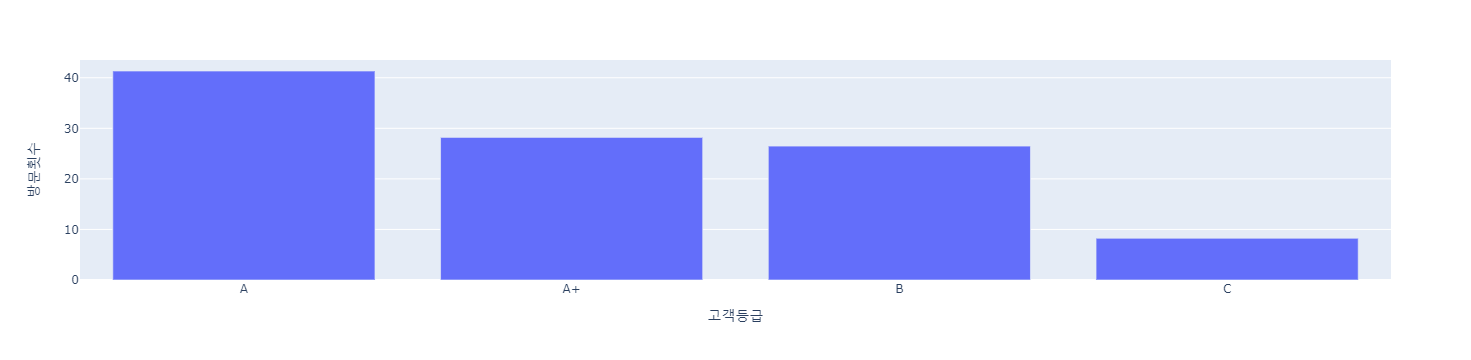

In [98]:
# 고객의 등급에 따라 방문횟수의 평균이 달라지는가?
p3 = df1.pivot_table(index='고객등급', values='방문횟수', aggfunc='mean').reset_index()
px.bar(p3, x='고객등급', y = '방문횟수')

In [99]:
# A등급 고객들과 C등급에 따라 방문횟수의 평균의 차이가 있을까?
# (통계적 가설검정)
# 1-1. '방문횟수'데이터의 분포가 정규분포를 따르는가?
# 귀무가설 : '방문횟수' 데이터의 분포는 정규분포를 따를것이다.
# 대립가설 : '방문횟수' 데이터의 분포는 정규분포를 다르지 않는다.
stats.normaltest(df1['방문횟수'])
# P.value < 0.05 (5%) / 대립가설 참
# '방문횟수'데이터의 분포는 정규분포를 따르지 않는다.

NormaltestResult(statistic=1862.5532451501065, pvalue=0.0)

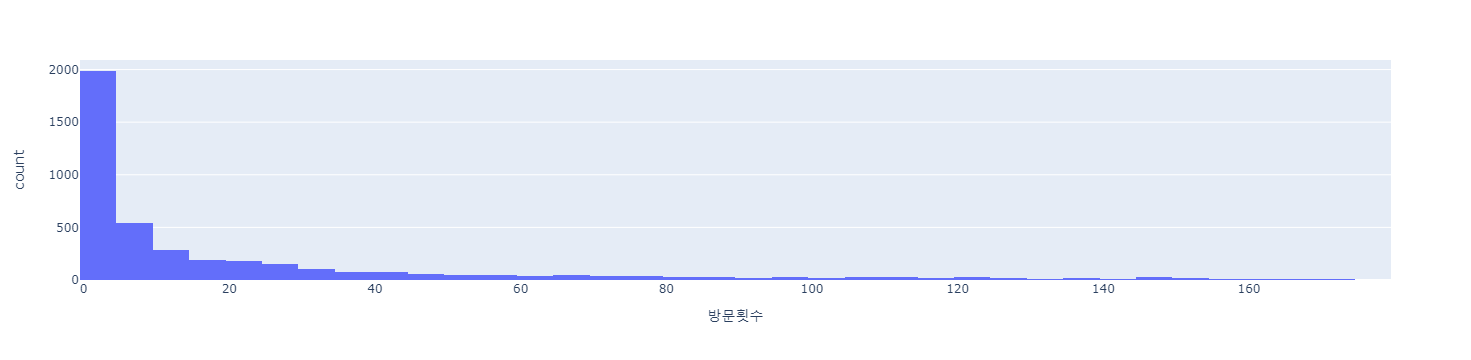

In [100]:
px.histogram(df1, x='방문횟수')

In [101]:
# 1-2. A등급 고객과 C등급 고객의 방문횟수의 평균의 차이가 있는가?
cond1 = (df1['고객등급'] == 'A')
cond2 = (df1['고객등급'] == 'C')
df_A = df1.loc[cond1]
df_C = df1.loc[cond2]

In [104]:
# 귀무가설 : 두 집단 간의 평균의 차이가 없다.
# 대립가설 : 두 집단 간의 평균의 차이가 있다.
stats.ranksums(df_A['방문횟수'], df_C['방문횟수'])
# P.value < 0.05 / 대립가설 참(귀무가설 기각) / 두 집단 간의 평균의 차이가 있다.

RanksumsResult(statistic=15.113414538645076, pvalue=1.3211268872901824e-51)

In [105]:
# 연령 -> 연령대로 변환하여, 연령대 별 1회방문구매평균의 유의마한 차이가 있는가?
# 1) Apply 구문을 이용하여 변환
def func2(data) :
    if len(str(data)) == 2:         # 두자리수 값에 대해서 아래와 같이 변환
        return str(data)[0] + '0대' # 숫자를 문자로 변환하여 첫글자를 따옴
    else :
        return '90대'

df1['연령대'] = df1['연령'].apply(func2)
df1['연령대'].value_counts()

40대    1326
50대     919
30대     882
60대     676
70대     368
80대      74
20대      34
90대       6
Name: 연령대, dtype: int64

In [106]:
# 2) loc. location 함수를 이용하여 변환
cond1 = (df1['연령'] >= 70)
cond2 = (df1['연령'] >= 60)
cond3 = (df1['연령'] >= 50)
cond4 = (df1['연령'] >= 40)
cond5 = (df1['연령'] < 40)


df1.loc[cond5, '연령대2'] = '30대이하'
df1.loc[cond4, '연령대2'] = '40대'
df1.loc[cond3, '연령대2'] = '50대'
df1.loc[cond2, '연령대2'] = '60대'
df1.loc[cond1, '연령대2'] = '70대이상' # 특정 조건에 맞는 데이터를 새로 생성

In [107]:
df1['연령대2'].value_counts()

40대      1326
50대       919
30대이하     916
60대       676
70대이상     448
Name: 연령대2, dtype: int64

In [108]:
# 30대이하 / 40대 / 50대의 1회방문구매평균의 유의미한 차이가 있는지 확인
cond1 = df1['연령대2'].isin(['30대이하','40대','50대'])
df1_age = df1.loc[cond1]
# 2-1) 1회방문구매평균의 분포가 정규분포를 따르는가?
# 귀무 : 해당 데이터의 분포는 정규분포와 같다
# 대립 : 해당 데이터의 분포는 정규분포와 다르다
stats.normaltest(df1_age['1회방문구매평균'])
# P.value < 0.05 (5%) / 대립가설이 참 / 해당 데이터의 분포는 정규분포와 다르다

NormaltestResult(statistic=1885.7393430966385, pvalue=0.0)

In [109]:
# 2-2) (비정규분포) 30/40/50대의 1회방문구매평균의 유의미한 차이가 있는가?
# 귀무 : 세 집단의 1회방문 구매평균의 차이가 없다
# 대립 : 세 집단의 1회방문 구매평균의 차이가 있다
cond1 = (df1_age['연령대2'] == '30대이하')
cond2 = (df1_age['연령대2'] == '40대')
cond3 = (df1_age['연령대2'] == '50대')
df1_30 = df1_age.loc[cond1]
df1_40 = df1_age.loc[cond2]
df1_50 = df1_age.loc[cond3]

stats.kruskal(df1_30['1회방문구매평균'], df1_40['1회방문구매평균'],
              df1_50['1회방문구매평균'])
# P.value < 0.05 (5%) / 대립가설 참 (귀무가설 기각)
# 대립 : 세 집단의 1회방문구매편균의 차이가 있다.

KruskalResult(statistic=34.66171829823149, pvalue=2.973743494041592e-08)

In [110]:
df1_age.pivot_table(index='연령대2', values = '1회방문구매평균', aggfunc='mean')

,1회방문구매평균
연령대2,
30대이하,29357.728281
40대,34368.693392
50대,35113.749847


# Mission3
* 판매 주력 상품에 대한 분석을 실시하고자 한다.
1) df_product에서 물품대분류 중 가장 많이 판매되는 3가지 항목을 확인하시오.
    (품목 별 구매수량의 합이 높은 3가지 항목을 확인)
2) 앞서 확인 물품대분류 3가지 항목을 추출하여 df1_product_top으로 선언하고,
    df1_product_top에서 구매매장 별 구매금액의 합과 평균을 계산하시오.
3) 공급일자 데이터를 날짜형식으로 pd.to_datetime(df_product['공급일자'], format='%Y%m%d') 변환한 다음, 
    연도/월/요일을 새로운 항목으로 선언하시오.
4) '월'에 따른 물품 대분류 별 구매금액의 합을 계산하시오.
5) 가장 판매량이 높은 요일을 확인 (요일 별 구매금액의 합을 확인)
6) '토요일'과 '일요일'의 '구매금액'의 평균의 차이가 있는지 가설검정을 수행

* 고객 데이터 분석을 실시하고자 한다. (df1)
7) 고객 데이터(df1)에서 '성별'에 따른 '구매금액'의 평균의 차이가 있는지 가설검정 수행

8) 결혼유무에서 '기혼'에 해당하는 고객들 중, 방문횟수가 높은 상위 30명의 고객 명단을 
    추출하여 result_member.xlsx 저장

In [14]:
# 1. df_product에서 물품대분류 중 가장 많이 판매되는 3가지 항목을 확인하시오.
# (품목 별 구매 수량의 합이 높은 3가지 항목을 확인)
df_product.pivot_table(index='물품대분류',values='구매수량',
                        aggfunc='sum').sort_values(by='구매수량', ascending = False).head(3)

,구매수량
물품대분류,
채소,210661.70
축산물,155188.75
간식,137427.30


In [15]:
# 2. 앞서 확인 물품대분류 3가지 항목을 추출하여 df1_product_top으로 선언하고,
# df1_product_top에서 구매매장 별 구매금액의 합과 평균을 계산하시오.
df1_product_top = df_product['물품대분류'].value_counts().head(3).index.tolist()
df1_product_top

['채소', '축산물', '간식']

In [16]:
cond1 = df_product['물품대분류'].isin(df1_product_top)
df_product.loc[cond1]

,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호
0,20170201,50142001,채소,잎/줄기채소,시금치,시금치(300g),1.0,2000,매장3,NaN,2101.0
1,20170201,60302012,축산물,육가공,돈가스/분쇄가공,튀김옷돈가스(400g),1.0,6300,매장3,NaN,2101.0
2,20170201,80301002,간식,밀가공,라면,감자라면(110g:1봉),2.0,2600,매장3,NaN,2101.0
3,20170201,80301010,간식,밀가공,라면,사리면(100g),1.0,900,매장3,NaN,2101.0
4,20170201,80305003,간식,밀가공,만두,고기만두(500g),1.0,5400,매장3,NaN,2101.0
...,...,...,...,...,...,...,...,...,...,...,...
735772,20170630,50217001,채소,열매채소,청양고추,청양고추(100g),1.0,1540,매장3,NaN,2637.0
735773,20170630,50706003,채소,버섯,팽이버섯,팽이버섯(150g),1.0,660,매장3,NaN,2637.0
735774,20170630,60302021,축산물,육가공,햄/소시지/훈제,꼬마소시지(300g)-매장,1.0,4620,매장3,NaN,2637.0
735775,20170630,80101031,간식,과자,스낵,누룽지(소:90g),1.0,1430,매장3,NaN,2637.0


In [17]:
df_product.loc[cond1].pivot_table(index='구매매장',values='구매금액',
                        aggfunc=['sum','mean'])

,sum,mean
,구매금액,구매금액
구매매장,,
매장1,363985400,4770.638426
매장2,461745602,4908.271082
매장3,916748142,4949.910326
매장4,419048570,5019.146844


In [18]:
# 3. 공급일자 데이터를 날짜형식으로 pd.to_datetime(df_product['공급일자'], format='%Y%m%d') 변환한 다음, 연도/월/요일을 새로운 항목으로 선언하시오.
df_product['공급일자'] = pd.to_datetime(df_product['공급일자'], format='%Y%m%d')
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735783 entries, 0 to 735782
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   공급일자      735783 non-null  datetime64[ns]
 1   물품코드      735783 non-null  int64         
 2   물품대분류     735783 non-null  object        
 3   물품중분류     735783 non-null  object        
 4   물품소분류     735783 non-null  object        
 5   물품명       735783 non-null  object        
 6   구매수량      735783 non-null  float64       
 7   구매금액      735783 non-null  int64         
 8   구매매장      735783 non-null  object        
 9   반품_원거래일자  10337 non-null   float64       
 10  회원번호      735761 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 61.7+ MB


In [78]:
df_product['연도'] = df_product['공급일자'].dt.year
df_product['월'] = df_product['공급일자'].dt.month
df_product['요일'] = df_product['공급일자'].dt.day_name()

In [75]:
df_product

,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호,방문횟수,연도,월,요일
0,2017-02-01,50142001,채소,잎/줄기채소,시금치,시금치(300g),1.0,2000,매장3,NaN,2101.0,1,2017,2,<bound method PandasDelegate._add_delegate_acc...
1,2017-02-01,60302012,축산물,육가공,돈가스/분쇄가공,튀김옷돈가스(400g),1.0,6300,매장3,NaN,2101.0,1,2017,2,<bound method PandasDelegate._add_delegate_acc...
2,2017-02-01,80301002,간식,밀가공,라면,감자라면(110g:1봉),2.0,2600,매장3,NaN,2101.0,1,2017,2,<bound method PandasDelegate._add_delegate_acc...
3,2017-02-01,80301010,간식,밀가공,라면,사리면(100g),1.0,900,매장3,NaN,2101.0,1,2017,2,<bound method PandasDelegate._add_delegate_acc...
4,2017-02-01,80305003,간식,밀가공,만두,고기만두(500g),1.0,5400,매장3,NaN,2101.0,1,2017,2,<bound method PandasDelegate._add_delegate_acc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735778,2017-06-30,100201003,반찬,두부/유부,두부,두부(1모:420g),1.0,2200,매장3,NaN,2637.0,1,2017,6,<bound method PandasDelegate._add_delegate_acc...
735779,2017-06-30,100306006,반찬,즉석조리,간편요리,현미쌀가스(320g),1.0,5830,매장3,NaN,2637.0,1,2017,6,<bound method PandasDelegate._add_delegate_acc...
735780,2017-06-30,130214027,생활용품,생활용품,기타생활용품,모기기피제(로즈마리향),1.0,8470,매장3,NaN,2637.0,1,2017,6,<bound method PandasDelegate._add_delegate_acc...
735781,2017-06-30,130501098,생활용품,화장품,기초화장품,수피아 알로에베라잎즙 수딩젤,1.0,7370,매장3,NaN,2637.0,1,2017,6,<bound method PandasDelegate._add_delegate_acc...


In [47]:
# 4. '월'에 따른 물품 대분류 별 구매금액의 합을 계산하시오.
df_product.pivot_table(index='월',values='구매금액',
                        aggfunc='sum')

,구매금액
월,
1,746514195
2,626379951
3,731169409
4,681583060
5,676168421
6,715232752


In [48]:
# 5. 가장 판매량이 높은 요일을 확인 (요일 별 구매금액의 합을 확인)
df_product.pivot_table(index='요일',values='구매금액',
                        aggfunc='sum').sort_values(by='구매금액', ascending=False) # 내림차순 

,구매금액
요일,
Monday,747139060
Thursday,678745315
Friday,638046105
Wednesday,629856469
Tuesday,610254061
Saturday,557242936
Sunday,315763842


In [50]:
# 6. '토요일'과 '일요일'의 '구매금액'의 평균의 차이가 있는지 가설검정을 수행
df_product['요일']

0         Wednesday
1         Wednesday
2         Wednesday
3         Wednesday
4         Wednesday
            ...    
735778       Friday
735779       Friday
735780       Friday
735781       Friday
735782       Friday
Name: 요일, Length: 735783, dtype: object

In [51]:
cond1 = (df_product['요일'] == 'Saturday')
cond2 = (df_product['요일'] == 'Sunday')
df_S1 = df_product.loc[cond1]
df_S2 = df_product.loc[cond2]

In [60]:
stats.ranksums(df_S1['구매금액'], df_S2['구매금액'])

RanksumsResult(statistic=-3.0474877976155326, pvalue=0.002307628950574978)

In [63]:
# 7. 고객 데이터(df1)에서 '성별'에 따른 '구매금액'의 평균의 차이가 있는지 가설검정 수행
cond1 = (df1['성별'] == '남')
cond1 = (df1['성별'] == '여')
df_m = df1[cond1]
df_f = df1[cond2]

In [64]:
stats.ranksums(df_m['구매금액'], df_f['구매금액'])

RanksumsResult(statistic=24.933096937689236, pvalue=3.2573260879703293e-137)

In [73]:
# 8.결혼유무에서 '기혼'에 해당하는 고객들 중, 방문횟수가 높은 상위 30명의 고객 명단을 추출하여 result_member.xlsx 저장
cond1 = (df1['결혼유무'] == '기혼')
df1.loc[cond1].sort_values(by='방문횟수',
                           ascending=False).head(30).to_excel('result_member.xlsx')